In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stocknews/upload_DJIA_table.csv
/kaggle/input/stocknews/Combined_News_DJIA.csv
/kaggle/input/stocknews/RedditNews.csv


# Guidelines for PGPDSE FT Capstone Project – Interim Report

Industry Review
-	Industry Review – Current practices, Background Research 
-	Literature Survey - Publications, Application, past and undergoing research

Datasetand Domain
-	Data Dictionary 
-	Variable categorization (count of numeric and categorical)
-	Pre Processing Data Analysis (count of missing/ null values, redundant columns, etc.)
-	Alternate sources of data that can supplement the core dataset (at least 2-3 columns)
-	Project Justification - Project Statement, Complexity involved, Project Outcome –Commercial, Academic or Social value

Data Exploration (EDA)
-	Relationship between variables
-	Check for 
o	multi-collinearity
o	distribution of variables
o	presence of outliers and its treatment
o	statistical significance of variables
o	class imbalance and its treatment 

Feature Engineering
-	Whether any transformations required
-	Scaling the data
-	Feature selection 
-	Dimensionality reduction

Assumptions 
-	Check for the assumptions to be satisfied for each of the models in 

	Regression – SLR, Multiple Linear Regression, Logistic Regression

	Classification – Decision Tree, Random Forest, SVM, Bagged and boosted models

	Clustering – PCA (multi-collinearity), K-Means (presence of outliers, scaling, conversion to numericaletc.)


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Understand the Dataset: 
Our sample include 2 dataset: the df1 is the data of headline new about Dow Jones Stock Market and the df2 contain the data of Stock Price in Dow Jones Market


In [30]:
# Loading First Dataset
df1=pd.read_csv('/kaggle/input/stocknews/Combined_News_DJIA.csv')
df1.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


In [31]:
# Loading second dataset

df2= pd.read_csv('/kaggle/input/stocknews/upload_DJIA_table.csv')
df2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [32]:
# Let is check if both the table are of same size so that we can combine them and use.
print("Dataset 1:",df1.shape)
print("Dataset 2:",df2.shape)

Dataset 1: (1989, 27)
Dataset 2: (1989, 7)


Both the dataset has same Rows, So we can merge both datasets

As the datasets are having date column as column we can use it to merge.

In [33]:
# Merge the data st on the date field:

df= df1.merge(df2, how='inner', on='Date')
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727


Now in the above dataset, we are having top 25 news on a perticular date. For better analysis we need to combine all the 25 data into one column. We can make a new column "Combined_News".

In [34]:
# Let us combine the whole data into a list
# headline list
headline = []
for row  in range (0, len(df.index)):
    headline.append(" ".join(str(x) for x in df.iloc[row, 2:27]))
    
# The For loop is going to iterate through all the rows and columns from.....

In [35]:
# Let us check the combined news for the first date
headline[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

In [36]:
import re
# clean the data:
clean_headline = []

for i in range (0, len(headline)):
    clean_headline.append(re.sub("b[(')]", '', headline[i])) # remove b'
    clean_headline[i] = re.sub('b[(")]', '', clean_headline[i]) # remove b"
    clean_headline[i] = re.sub("\'", '', clean_headline[i]) # remove \'

In [37]:
# Add the clean headline to the dataset with new column:

df['Combined_News'] = clean_headline

df.head(1)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,Combined_News
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...


Looking at the data we can clearly see that there is lot of punctuations which makes it hard for the further analysis

In [38]:
import string
print("Punctuations we are going to remove are: ",string.punctuation)

Punctuations we are going to remove are:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [39]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

df['Combined_News_no_punct']=df['Combined_News'].apply(lambda x: remove_punctuation(x))
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,Combined_News,Combined_News_no_punct
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...,Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...,Why wont America and Nato help us If they wont...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,Remember that adorable 9-year-old who sang at ...,Remember that adorable 9yearold who sang at th...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,U.S. refuses Israel weapons to attack Iran: r...,US refuses Israel weapons to attack Iran repo...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,All the experts admit that we should legalise ...,All the experts admit that we should legalise ...


In [40]:
# checking the datatype of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    1989 non-null   object 
 1   Label                   1989 non-null   int64  
 2   Top1                    1989 non-null   object 
 3   Top2                    1989 non-null   object 
 4   Top3                    1989 non-null   object 
 5   Top4                    1989 non-null   object 
 6   Top5                    1989 non-null   object 
 7   Top6                    1989 non-null   object 
 8   Top7                    1989 non-null   object 
 9   Top8                    1989 non-null   object 
 10  Top9                    1989 non-null   object 
 11  Top10                   1989 non-null   object 
 12  Top11                   1989 non-null   object 
 13  Top12                   1989 non-null   object 
 14  Top13                   1989 non-null   

In [41]:
# Let us convert the date column into datetime object
df['Date'] = pd.to_datetime(df['Date'])

In [42]:
# checking for duplicate values
df.duplicated().sum()

0

In [43]:
df.isnull().sum()

Date                      0
Label                     0
Top1                      0
Top2                      0
Top3                      0
Top4                      0
Top5                      0
Top6                      0
Top7                      0
Top8                      0
Top9                      0
Top10                     0
Top11                     0
Top12                     0
Top13                     0
Top14                     0
Top15                     0
Top16                     0
Top17                     0
Top18                     0
Top19                     0
Top20                     0
Top21                     0
Top22                     0
Top23                     1
Top24                     3
Top25                     3
Open                      0
High                      0
Low                       0
Close                     0
Volume                    0
Adj Close                 0
Combined_News             0
Combined_News_no_punct    0
dtype: int64

Top23, Top24 and Top35 seems to have some null values, we can replace it with '' string. This means that for that perticular day top23, top24, and top25 news was not presnt.

In [44]:
# filling the null values with ''
df.fillna(value='',inplace=True)

In [45]:
df.isnull().sum()

Date                      0
Label                     0
Top1                      0
Top2                      0
Top3                      0
Top4                      0
Top5                      0
Top6                      0
Top7                      0
Top8                      0
Top9                      0
Top10                     0
Top11                     0
Top12                     0
Top13                     0
Top14                     0
Top15                     0
Top16                     0
Top17                     0
Top18                     0
Top19                     0
Top20                     0
Top21                     0
Top22                     0
Top23                     0
Top24                     0
Top25                     0
Open                      0
High                      0
Low                       0
Close                     0
Volume                    0
Adj Close                 0
Combined_News             0
Combined_News_no_punct    0
dtype: int64

In [46]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,Combined_News,Combined_News_no_punct
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...,Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...,Why wont America and Nato help us If they wont...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,Remember that adorable 9-year-old who sang at ...,Remember that adorable 9yearold who sang at th...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,U.S. refuses Israel weapons to attack Iran: r...,US refuses Israel weapons to attack Iran repo...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,All the experts admit that we should legalise ...,All the experts admit that we should legalise ...


# Lets Do some Exploratory Data Analysis

In [47]:
# Overview of the numerc coumns in the dataset
df.describe()

,Date,Label,Open,High,Low,Close,Volume,Adj Close
count,1989,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,2012-07-20 11:52:23.891402752,0.535445,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
min,2008-08-08 00:00:00,0.000000,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,2010-07-30 00:00:00,0.000000,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,2012-07-19 00:00:00,1.000000,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,2014-07-14 00:00:00,1.000000,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,2016-07-01 00:00:00,1.000000,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625
std,NaN,0.498867,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996


<Axes: xlabel='Label', ylabel='count'>

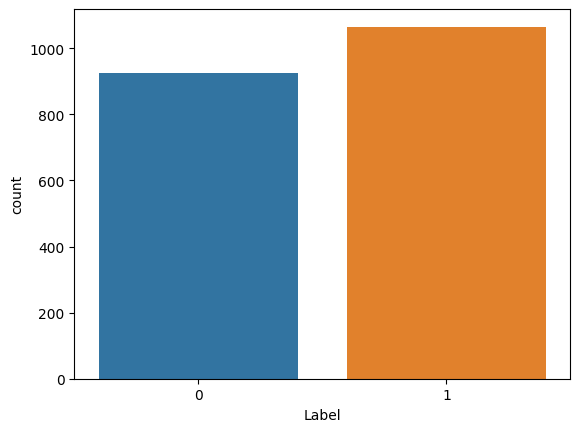

In [48]:
# Let us check the Label value and see if there is any bias in data of any kind
sns.countplot(df, x="Label")

Count of both values are almost the same, and the slight increase in label 1 is because of the overall trend of stock going up.

Let us check how the price variation of the stock happens from year 2008 to 2016

In [67]:
import plotly.graph_objects as go


fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df.Date, y=df.Close,
                    mode='lines'))
title = []
title.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Development of stock values from Aug, 2008 to Jun, 2016',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
fig1.update_layout(xaxis_title='Date',
                   yaxis_title='Closing stock value (in $)',
                  annotations=title)
fig1.show()

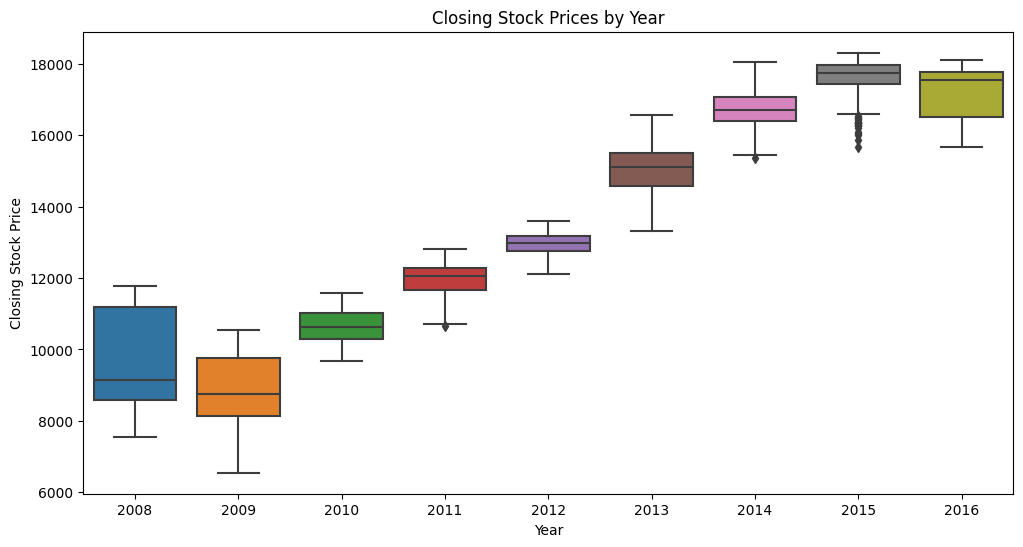

In [50]:
# We can create a box plot of the closing stock prices by year using the seaborn library.
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Date'].dt.year, y='Close', data=df)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.show()

There seems to be a lot of outliers in the year of 2015. Need to analysis why this has happened

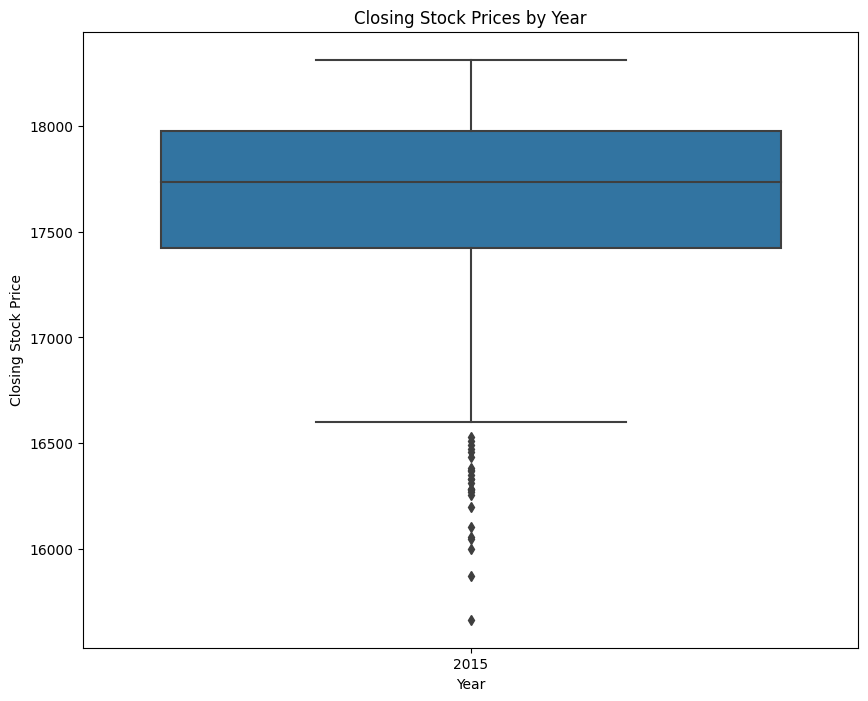

In [54]:
# plotting a bargraph for the year 2015
new_df = df[df['Date'].dt.year  == 2015]
plt.figure(figsize=(10,8))
sns.boxplot(x=new_df['Date'].dt.year, y='Close', data=new_df)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.show()

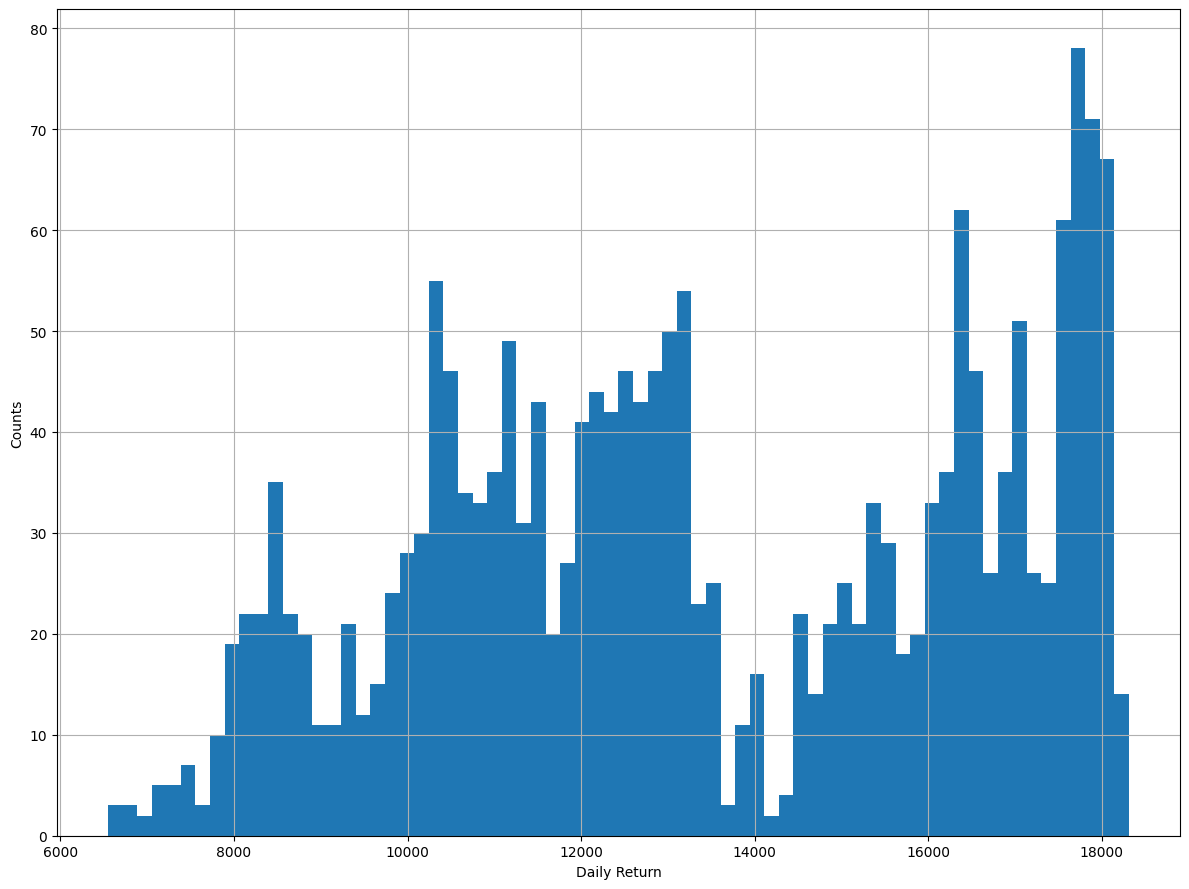

In [91]:
plt.figure(figsize=(12, 9))


df['Adj Close'].hist(bins=70)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
    
plt.tight_layout()


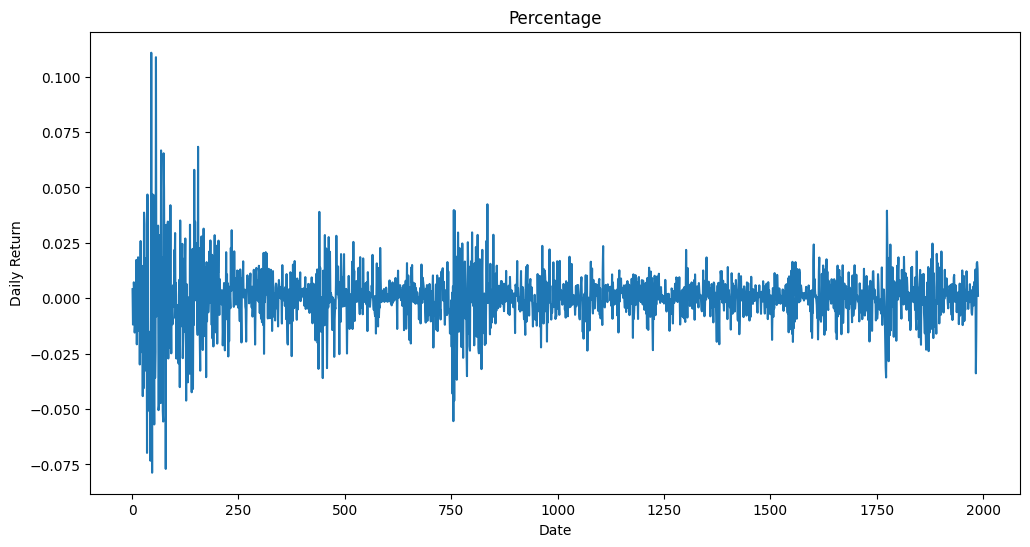

In [58]:
# To visualize the daily returns, we can create a line chart using the pandas library. 
# The line chart will show the percentage change in price from one day to the next.

daily_returns = df['Close'].pct_change()

# Create a line chart of the daily returns
plt.figure(figsize=(12,6))
plt.plot(daily_returns.index, daily_returns.values)
plt.title('Percentage')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()
#This will create a line chart showing the daily returns over time.

In [69]:
new_df  = df.copy()

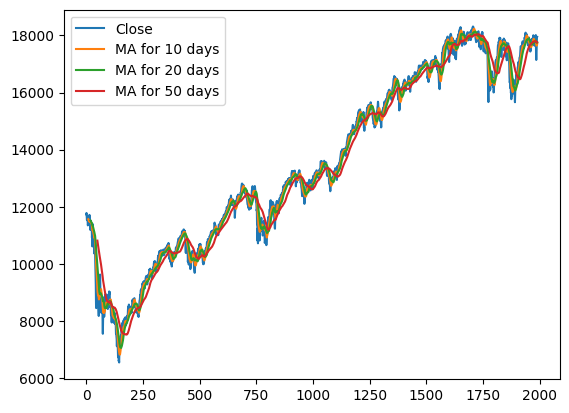

<Figure size 1400x500 with 0 Axes>

In [80]:
# The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. 
# The average is taken over a specific period of time, l
# ike 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.



ma_day = [10, 20, 50]


for ma in ma_day:
    column_name = f"MA for {ma} days"
    new_df[column_name] = new_df['Close'].rolling(ma).mean()
    

new_df[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.show()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.